In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")

In [2]:
def kernel(x1, x2):
    return np.exp( -0.5 * (x1 - x2)**2)

def calc_kernel_matrix(X):
    N = len(X)
    K = np.zeros((N, N))
    for n1 in range(N):
        for n2 in range(n1,N):
            K[n1, n2] = kernel(X[n1], X[n2])
    return K + K.T - np.diag(K.diagonal())

In [3]:
N = 100
# input, scalar
X = np.linspace(-5, 5, num=N)

# rbf covariance function
K = calc_kernel_matrix(X)

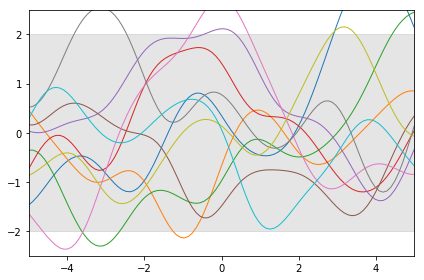

In [4]:
M = 10
Y = []
for i in range(M):
    Y.append(np.random.multivariate_normal(mean=np.zeros(N), cov=K))

f = plt.figure()
f.set_rasterized(True)
for i in range(M):
    plt.plot(X, Y[i], lw=1.0)
plt.fill_between(X, -2.0, 2.0, alpha=0.2, color=cmap(7))
plt.xlim(-5, 5)
plt.ylim(-2.5, 2.5)
plt.tight_layout()
#plt.savefig('gp_prior.png', bbox_inches='tight', dpi=150)

In [5]:
X_obs = np.array([-4.0, -3.0, -1.0, 0.0, 2.0])
Y_obs = np.array([-2.0, 0.0, 1.0, 2.0, -1.0])
#X_obs = X[20:80:2]
#Y_obs = np.sin(X_obs)

In [6]:
sig2_y = 0.0
K_obs = calc_kernel_matrix(X_obs)
invmat = np.linalg.inv(K_obs + sig2_y * np.eye(len(X_obs)))

In [7]:
mu = np.zeros(N)
sig2 = np.zeros(N)
for n in range(N):
    seq = [kernel(X_obs[i], X[n]) for i in range(len(X_obs))]
    mu[n] = np.dot(np.array(seq).T, np.dot(invmat, Y_obs))
    sig2[n] = sig2_y + kernel(X[n], X[n]) - np.dot(np.array(seq).T, np.dot(invmat, np.array(seq)))
    

std = np.sqrt(sig2)

In [8]:
mu = np.zeros(N)
sig2 = np.zeros(N)
Sig2 = np.zeros((N,N))
for n1 in range(N):
    seq1 = [kernel(X_obs[i], X[n1]) for i in range(len(X_obs))]
    mu[n1] = np.dot(np.array(seq1).T, np.dot(invmat, Y_obs))
    sig2[n1] = sig2_y + kernel(X[n1], X[n1]) - np.dot(np.array(seq1).T, np.dot(invmat, np.array(seq1)))
    for n2 in range(n1,N):
        seq2 = [kernel(X_obs[i], X[n2]) for i in range(len(X_obs))]
        Sig2[n1,n2] = sig2_y + kernel(X[n1], X[n2]) - np.dot(np.array(seq1).T, np.dot(invmat, np.array(seq2)))

std = np.sqrt(sig2)
Sig2 += Sig2.T - np.diag(sig2)

In [9]:
Y_post = []
for i in range(3):
    Y_post.append(np.random.multivariate_normal(mean=mu, cov=Sig2))

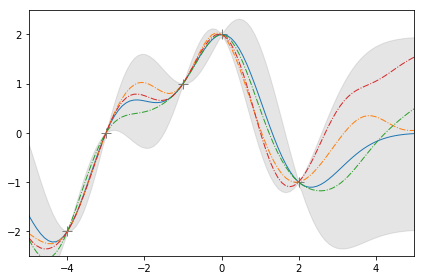

In [10]:
f = plt.figure()
f.set_rasterized(True)
plt.plot(X, mu, lw=1.0)
for i in range(3):
    plt.plot(X, Y_post[i], lw=1.0, ls='-.', color=cmap(1+i))
plt.fill_between(X, mu-std*1.96, mu+std*1.96, color=cmap(7), alpha=0.2)
plt.scatter(X_obs, Y_obs, marker='+', lw=1.0, s=100, color=cmap(7))
plt.xlim(-5, 5)
plt.ylim(-2.5, 2.5)
plt.tight_layout()
#plt.savefig('gp_post.png', bbox_inches='tight', dpi=150)